# Partie 1 : Chargement & Exploration

### Load data

In [217]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Nombre de données et proportion

In [218]:
print("Nombre de données : ", df.shape)
df['Survived'].value_counts()

Nombre de données :  (891, 12)


Survived
0    549
1    342
Name: count, dtype: int64

### Colonnes avec valeur manquante

In [219]:
# Créer un DataFrame qui affiche à la fois le nombre et le pourcentage de valeurs manquantes
missing_data = pd.DataFrame({
    'Nombre de valeurs manquantes': df[null_columns].isnull().sum(),
    'Pourcentage (%)': (df[null_columns].isnull().sum() / df.shape[0]) * 100
})

# Trier par nombre de valeurs manquantes décroissant
missing_data = missing_data.sort_values('Nombre de valeurs manquantes', ascending=False)

# Afficher le résultat
missing_data

,Nombre de valeurs manquantes,Pourcentage (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


# Partie 2 : Nettoyage & Préparation

### Imputation des valeurs manquantes

In [220]:
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

missing_data = pd.DataFrame({
    'Nombre de valeurs manquantes': df[null_columns].isnull().sum(),
    'Pourcentage (%)': (df[null_columns].isnull().sum() / df.shape[0]) * 100
})

# Trier par nombre de valeurs manquantes décroissant
missing_data = missing_data.sort_values('Nombre de valeurs manquantes', ascending=False)

# Afficher le résultat
missing_data

,Nombre de valeurs manquantes,Pourcentage (%)
Cabin,687,77.104377
Age,0,0.000000
Embarked,0,0.000000


### Suppression des colonnes inutiles

In [221]:
dfCleared = df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1)
dfCleared.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Créez une nouvelle variable Title à partir de Name

Fréquence des titres :
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Ny Aro\AppData\Local\Temp\ipykernel_13624\1543133324.py:5: SyntaxWarning: invalid escape sequence '\.'
  dfCleared['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


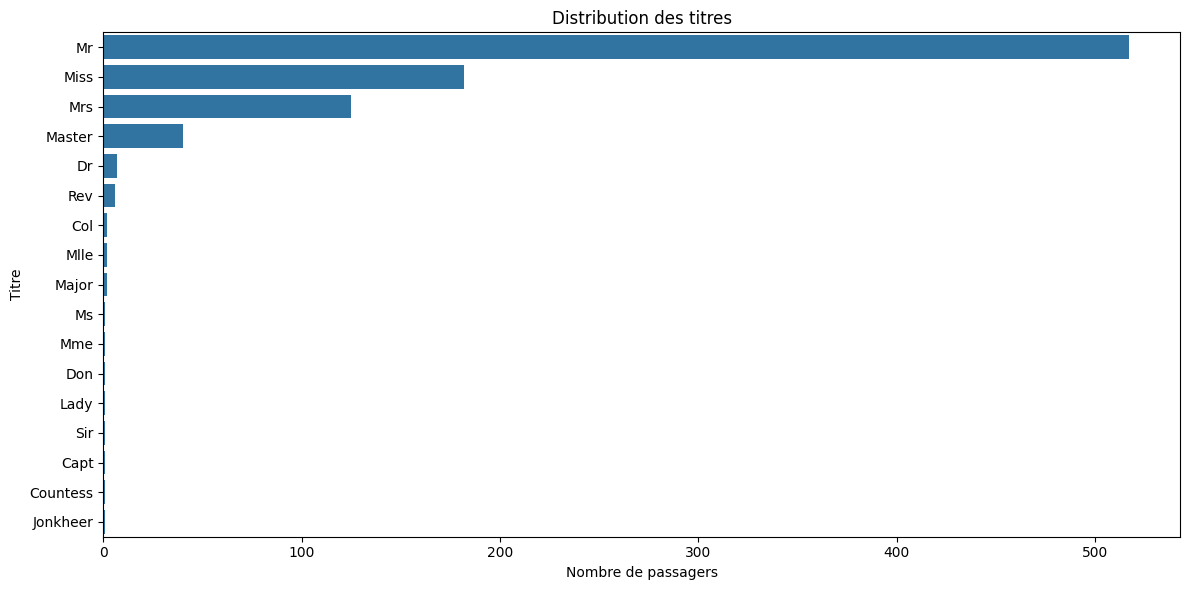


Taux de survie par titre :
Title
Countess    1.000000
Ms          1.000000
Lady        1.000000
Mme         1.000000
Mlle        1.000000
Sir         1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Major       0.500000
Col         0.500000
Dr          0.428571
Mr          0.156673
Capt        0.000000
Don         0.000000
Jonkheer    0.000000
Rev         0.000000
Name: Survived, dtype: float64


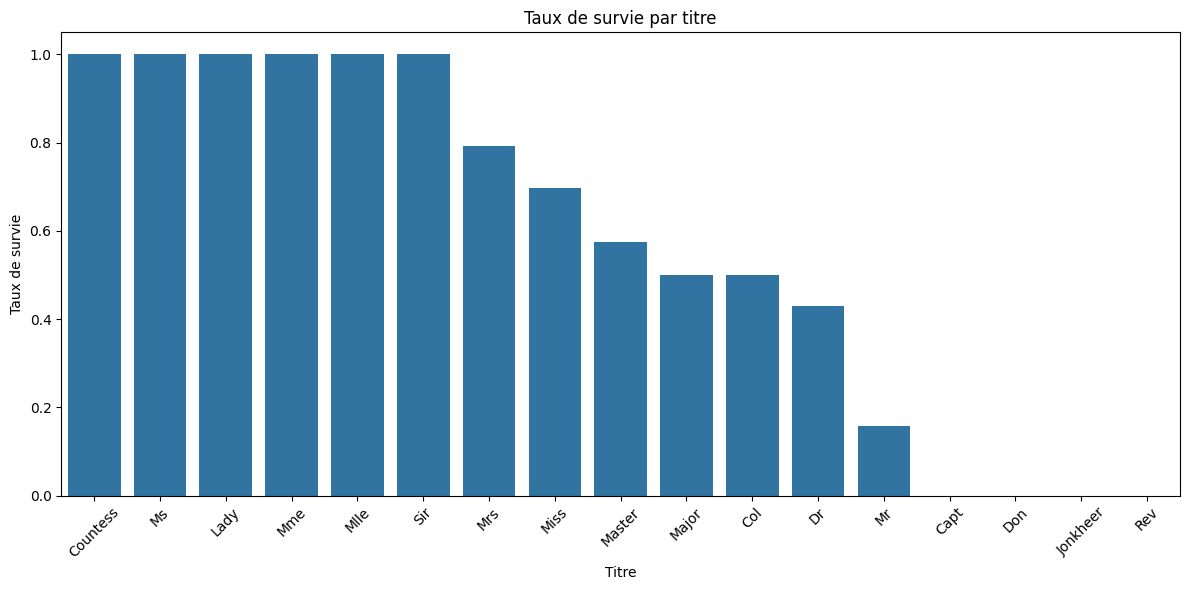

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire le titre à partir du nom
dfCleared['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Afficher les titres uniques et leur fréquence
title_counts = dfCleared['Title'].value_counts()
print("Fréquence des titres :")
print(title_counts)

# Visualiser la distribution des titres
plt.figure(figsize=(12, 6))
sns.countplot(y='Title', data=dfCleared, order=title_counts.index)
plt.title('Distribution des titres')
plt.xlabel('Nombre de passagers')
plt.ylabel('Titre')
plt.tight_layout()
plt.show()

# Vérifier si la variable est informative en examinant le taux de survie par titre
title_survival = dfCleared.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print("\nTaux de survie par titre :")
print(title_survival)

# Visualiser le taux de survie par titre
plt.figure(figsize=(12, 6))
sns.barplot(x=title_survival.index, y=title_survival.values)
plt.title('Taux de survie par titre')
plt.xlabel('Titre')
plt.ylabel('Taux de survie')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Partie 3 : Encodage & Prétraitement

### Encodez les variables catégorielles (Sex, Embarked, Title) à l’aide de LabelEncoder ou OneHotEncoder. Testez les deux méthodes.

In [223]:
from sklearn.preprocessing import LabelEncoder

# Créer des copies du DataFrame pour les deux méthodes d'encodage
df_label = dfCleared.copy()

# Appliquer LabelEncoder
label_encoders = {}
for column in ['Sex', 'Embarked', 'Title']:
    if column in df_label.columns:  # Vérifier que la colonne existe
        le = LabelEncoder()
        df_label[column] = le.fit_transform(df_label[column].astype(str))
        label_encoders[column] = le  # Stocker l'encodeur pour référence ultérieure

# Afficher les premières lignes après encodage
print("Données après LabelEncoder:")
print(df_label[['Sex', 'Embarked', 'Title']].head() if 'Title' in df_label.columns else df_label[['Sex', 'Embarked']].head())

# Afficher la correspondance des valeurs encodées (optionnel)
for column, le in label_encoders.items():
    print(f"\nCorrespondance pour {column}:")
    for i, class_name in enumerate(le.classes_):
        print(f"{class_name} -> {i}")

dfCleared = df_label

Données après LabelEncoder:
   Sex  Embarked  Title
0    1         2     12
1    0         0     13
2    0         2      9
3    0         2     13
4    1         2     12

Correspondance pour Sex:
female -> 0
male -> 1

Correspondance pour Embarked:
C -> 0
Q -> 1
S -> 2

Correspondance pour Title:
Capt -> 0
Col -> 1
Countess -> 2
Don -> 3
Dr -> 4
Jonkheer -> 5
Lady -> 6
Major -> 7
Master -> 8
Miss -> 9
Mlle -> 10
Mme -> 11
Mr -> 12
Mrs -> 13
Ms -> 14
Rev -> 15
Sir -> 16


In [224]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Créer une copie du DataFrame
df_onehot = dfCleared.copy()

# Appliquer OneHotEncoder
for column in ['Sex', 'Embarked', 'Title']:
    if column in df_onehot.columns:  # Vérifier que la colonne existe
        # Créer un encodeur
        ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' évite la multicolinéarité
        
        # Transformer la colonne
        encoded = ohe.fit_transform(df_onehot[[column]])
        
        # Créer un DataFrame avec les colonnes encodées
        column_names = [f"{column}_{cat}" for cat in ohe.categories_[0][1:]]
        encoded_df = pd.DataFrame(encoded, columns=column_names, index=df_onehot.index)
        
        # Concaténer avec le DataFrame original
        df_onehot = pd.concat([df_onehot, encoded_df], axis=1)
        
        # Supprimer la colonne originale
        df_onehot.drop(column, axis=1, inplace=True)

# Afficher les premières lignes après encodage
print("Données après OneHotEncoder:")
df_onehot.head()

Données après OneHotEncoder:


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2,Title_1,...,Title_7,Title_8,Title_9,Title_10,Title_11,Title_12,Title_13,Title_14,Title_15,Title_16
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Standardisez Age et Fare avec StandardScaler. Pourquoi cette étape peut-elle être utile même avec des arbres ?

In [225]:
from sklearn.preprocessing import StandardScaler

# Créer une copie du DataFrame
df_scaled = dfCleared.copy()

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la standardisation aux colonnes numériques
for column in ['Age', 'Fare']:
    if column in df_scaled.columns:  # Vérifier que la colonne existe
        # Reshape pour gérer les valeurs manquantes si nécessaire
        df_scaled[column] = scaler.fit_transform(df_scaled[[column]])

# Afficher les premières lignes après standardisation
print("Données après standardisation:")
print(df_scaled[['Age', 'Fare']].describe())
dfCleared = df_scaled
dfCleared

Données après standardisation:
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,-0.565736,1,0,-0.502445,2,12
1,1,1,0,0.663861,1,0,0.786845,0,13
2,1,3,0,-0.258337,0,0,-0.488854,2,9
3,1,1,0,0.433312,1,0,0.420730,2,13
4,0,3,1,0.433312,0,0,-0.486337,2,12
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2,15
887,1,1,0,-0.796286,0,0,-0.044381,2,9
888,0,3,0,-0.104637,1,2,-0.176263,2,9
889,1,1,1,-0.258337,0,0,-0.044381,0,12


Pourquoi standardiser même avec des arbres de décision ?
Bien que les arbres de décision ne soient pas sensibles à l'échelle des variables (contrairement aux algorithmes comme la régression logistique ou les SVM), la standardisation peut être utile pour plusieurs raisons :

Interprétabilité des résultats : Les variables standardisées permettent de comparer plus facilement l'importance des différentes caractéristiques.
Régularisation et hyperparamètres : Certains hyperparamètres des arbres (comme la profondeur maximale ou le nombre minimum d'échantillons par feuille) peuvent être plus faciles à optimiser lorsque les variables sont à la même échelle.
Ensembles d'arbres : Pour les méthodes d'ensemble comme le Gradient Boosting ou les Random Forests, la standardisation peut parfois améliorer légèrement les performances.
Visualisation et analyse exploratoire : Les données standardisées facilitent la visualisation et l'analyse exploratoire.
Cohérence du pipeline : Si vous utilisez plusieurs algorithmes dans votre pipeline (pas seulement des arbres), il est plus simple d'avoir un prétraitement uniforme.
Détection d'anomalies : La standardisation facilite la détection des valeurs aberrantes, ce qui peut être utile pour le nettoyage des données.
Stabilité numérique : Dans certains cas, la standardisation peut améliorer la stabilité numérique des calculs.
Cependant, il est important de noter que pour les arbres de décision purs, la standardisation n'affecte pas directement les performances du modèle, car les arbres utilisent des seuils de division qui sont indépendants de l'échelle des variables. C'est une différence fondamentale par rapport aux algorithmes basés sur la distance ou les gradients.

### Divisez le dataset en X et y. Cible = Survived. Faites un train_test_split (70/30) avec random_state=42.

In [226]:
from sklearn.model_selection import train_test_split

x = dfCleared.drop('Survived', axis=1)
y = dfCleared['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 8)
(268, 8)
(623,)
(268,)


# Partie 4 : Visualisation & Analyse Exploratoire

### Achez la heatmap des corrélations. Quelles sont les variables les plus corrélées avec Survived ?

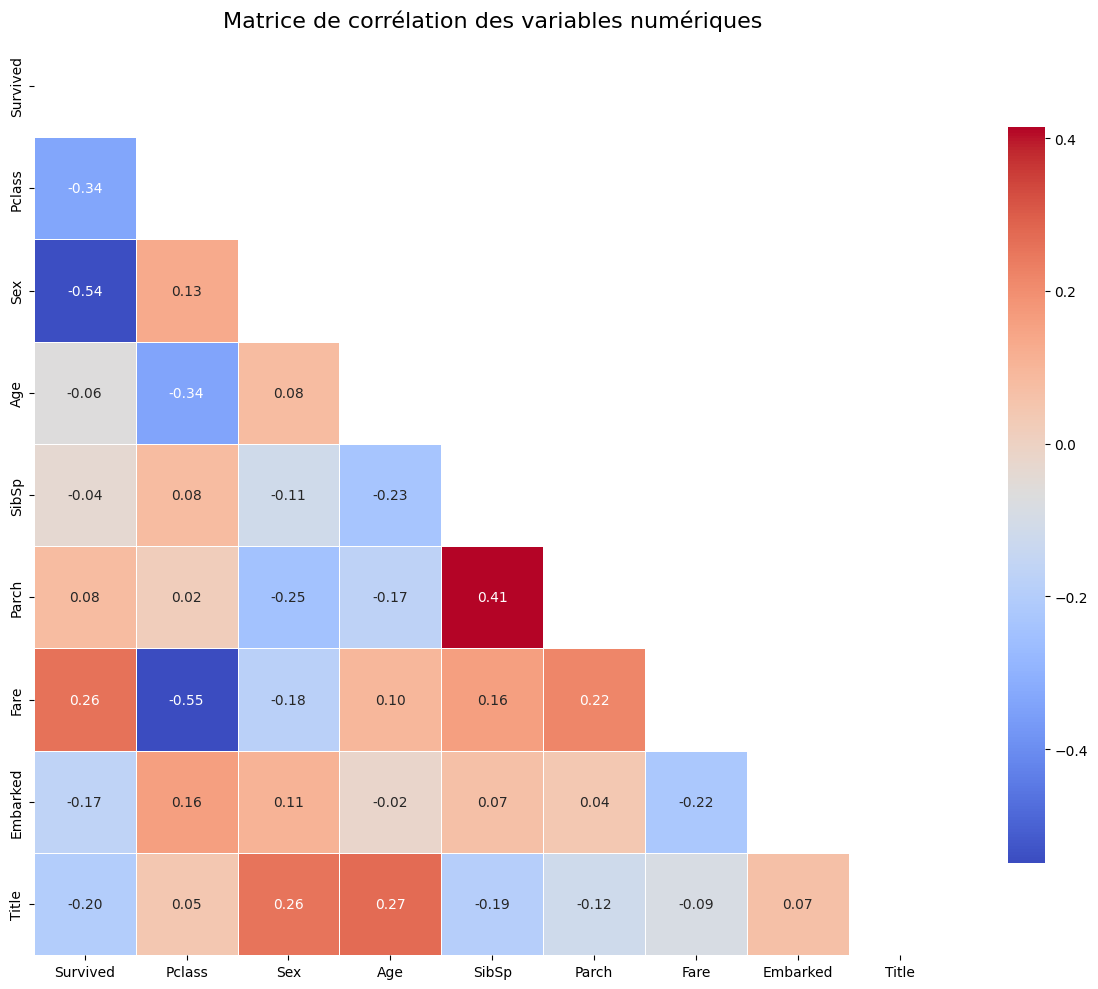

Corrélations avec Survived:
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Title      -0.201345
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


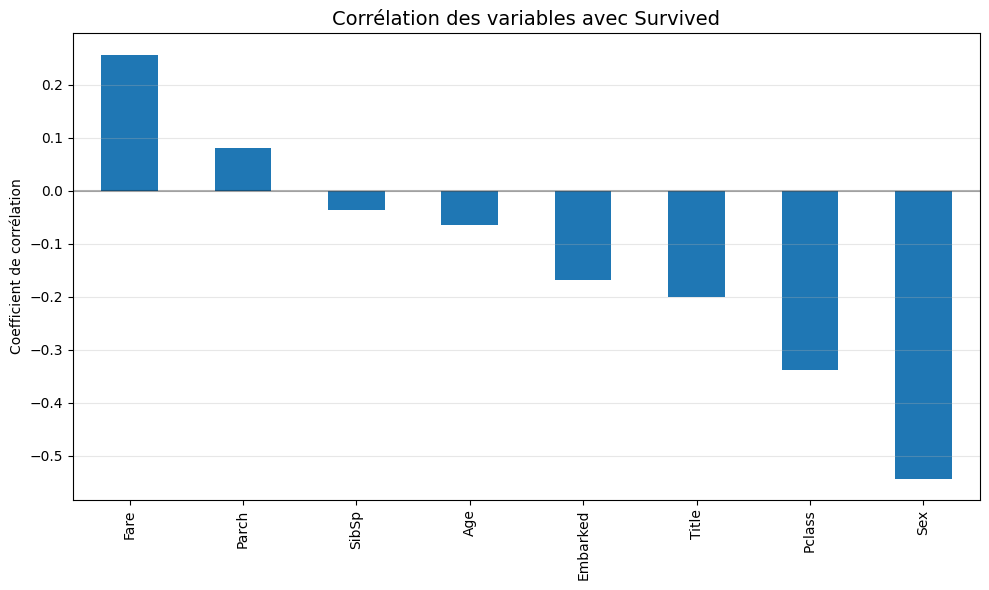

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculer la matrice de corrélation
# Sélectionner uniquement les colonnes numériques pour éviter les erreurs
numeric_df = dfCleared.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Créer la heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Masque pour afficher seulement la moitié inférieure
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables numériques', fontsize=16)
plt.tight_layout()
plt.show()

# Afficher les corrélations avec Survived, triées par ordre décroissant
if 'Survived' in numeric_df.columns:
    survived_corr = corr_matrix['Survived'].sort_values(ascending=False)
    print("Corrélations avec Survived:")
    print(survived_corr)
    
    # Visualiser les corrélations avec Survived
    plt.figure(figsize=(10, 6))
    survived_corr.drop('Survived').plot(kind='bar')
    plt.title('Corrélation des variables avec Survived', fontsize=14)
    plt.ylabel('Coefficient de corrélation')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

### Réalisez des barplots de survie par Sex, Pclass, Embarked, et Title. Qu’en concluez-vous ?

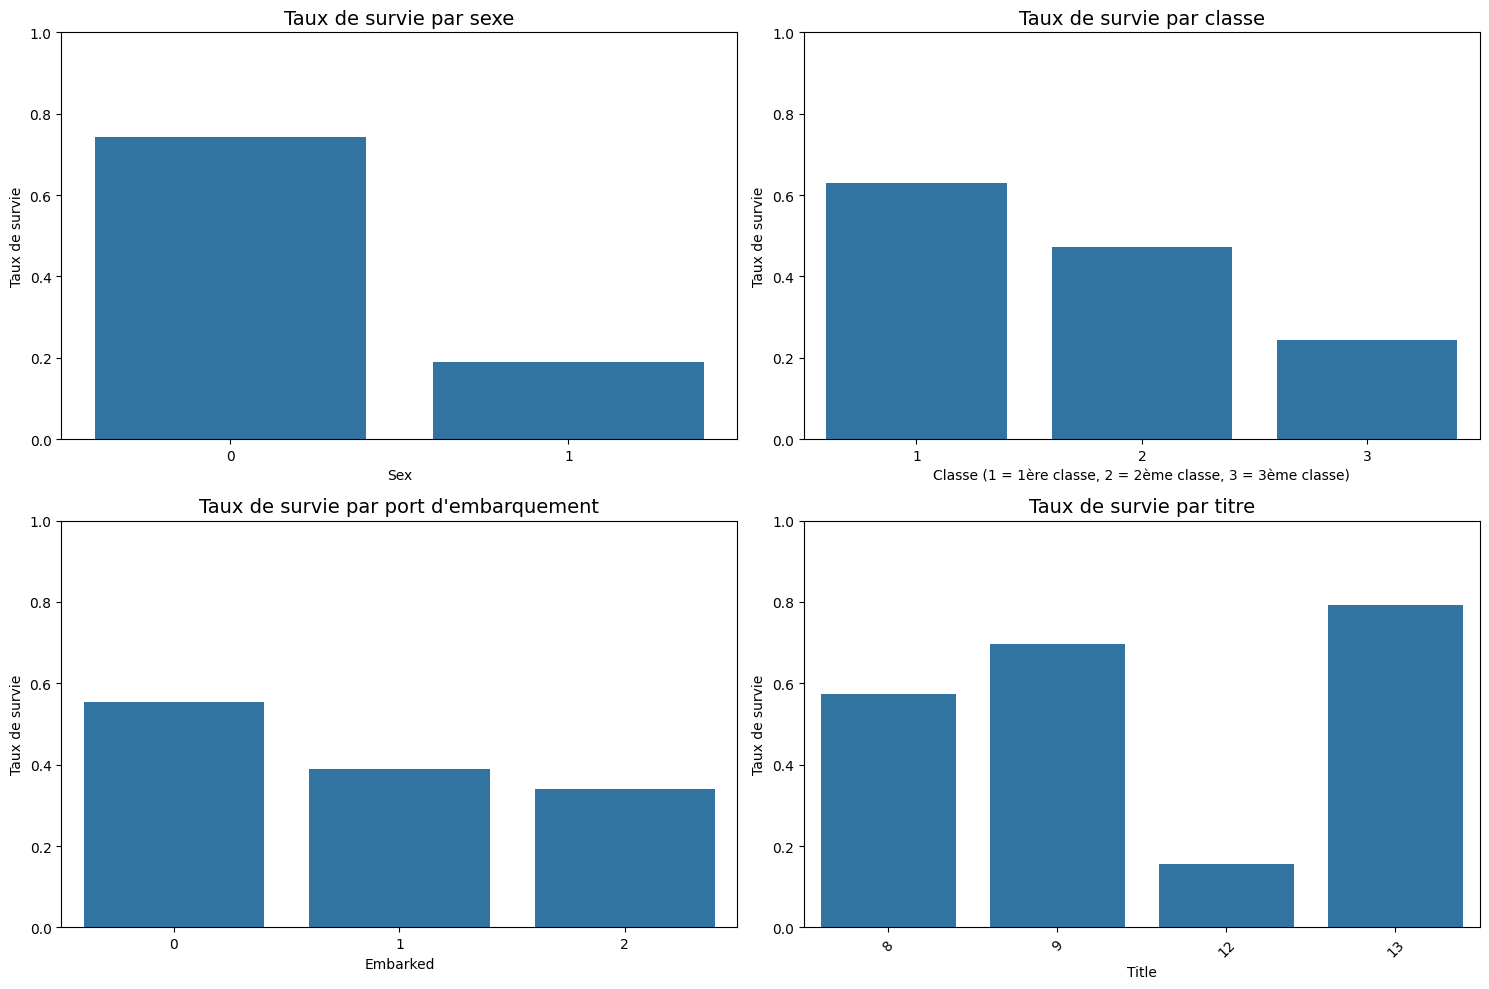

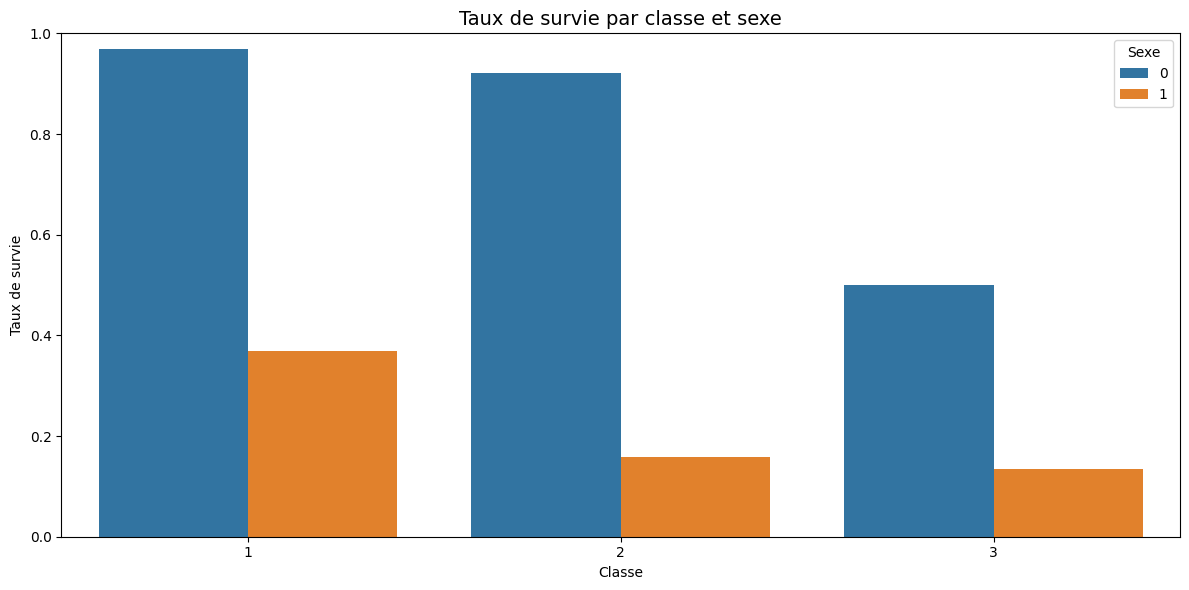

In [229]:
# Configurer la taille des figures
plt.figure(figsize=(15, 10))

# 1. Taux de survie par sexe
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=dfCleared, errorbar=None)
plt.title('Taux de survie par sexe', fontsize=14)
plt.ylabel('Taux de survie')
plt.ylim(0, 1)

# 2. Taux de survie par classe
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=dfCleared, errorbar=None)
plt.title('Taux de survie par classe', fontsize=14)
plt.ylabel('Taux de survie')
plt.xlabel('Classe (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe)')
plt.ylim(0, 1)

# 3. Taux de survie par port d'embarquement
plt.subplot(2, 2, 3)
sns.barplot(x='Embarked', y='Survived', data=dfCleared, errorbar=None)
plt.title('Taux de survie par port d\'embarquement', fontsize=14)
plt.ylabel('Taux de survie')
plt.ylim(0, 1)

# 4. Taux de survie par titre
plt.subplot(2, 2, 4)
if 'Title' in dfCleared.columns:
    # Limiter aux titres les plus fréquents pour la lisibilité
    title_counts = dfCleared['Title'].value_counts()
    common_titles = title_counts[title_counts >= 10].index
    title_df = dfCleared[dfCleared['Title'].isin(common_titles)]
    
    sns.barplot(x='Title', y='Survived', data=title_df, errorbar=None)
    plt.title('Taux de survie par titre', fontsize=14)
    plt.ylabel('Taux de survie')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
else:
    plt.text(0.5, 0.5, 'Variable Title non disponible', 
             horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

# Analyse plus détaillée : taux de survie par sexe et classe
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=dfCleared, errorbar=None)
plt.title('Taux de survie par classe et sexe', fontsize=14)
plt.ylabel('Taux de survie')
plt.xlabel('Classe')
plt.ylim(0, 1)
plt.legend(title='Sexe')
plt.tight_layout()
plt.show()

#### Selon l'encodage fais par LabelEncoder

Correspondance pour Sex:
female -> 0
male -> 1

Correspondance pour Embarked:
C -> 0
Q -> 1
S -> 2

Correspondance pour Title:
Capt -> 0
Col -> 1
Countess -> 2
Don -> 3
Dr -> 4
Jonkheer -> 5
Lady -> 6
...
Mrs -> 13
Ms -> 14
Rev -> 15
Sir -> 16

### Conclusions possibles à partir de ces visualisations :
Sexe (Sex) :
Les femmes avaient un taux de survie nettement plus élevé que les hommes
Cela confirme la politique "les femmes et les enfants d'abord" lors de l'évacuation
Classe (Pclass) :
Les passagers de première classe avaient un taux de survie beaucoup plus élevé que ceux de troisième classe
Il y a une relation linéaire décroissante entre la classe et le taux de survie
Cela suggère que le statut socio-économique a joué un rôle important dans les chances de survie
Port d'embarquement (Embarked) :
Les passagers embarqués à Cherbourg (C) avaient généralement un meilleur taux de survie
Ceux embarqués à Southampton (S) avaient le taux de survie le plus bas
Cette variable pourrait être un proxy pour d'autres facteurs comme la nationalité ou la classe sociale
Titre (Title) :
Les titres féminins comme "Mrs" et "Miss" sont associés à des taux de survie élevés
"Master" (jeunes garçons) a également un taux de survie élevé
"Mr" a généralement le taux de survie le plus bas
Certains titres comme "Dr", "Rev" peuvent montrer des tendances intéressantes
Interaction entre sexe et classe :
Les femmes de première classe avaient presque toutes survécu
Même les femmes de troisième classe avaient un meilleur taux de survie que les hommes de première classe
Les hommes de troisième classe avaient le taux de survie le plus bas

# Partie 5 : Arbre de Décision

### Entraînez un DecisionTreeClassifier (max_depth=4). Affichez l’arbre avec plot_tree ou graphviz.

[[140  17]
 [ 31  80]]
Score sur l'ensemble d'entraînement : 0.8475
Score sur l'ensemble de test : 0.8209


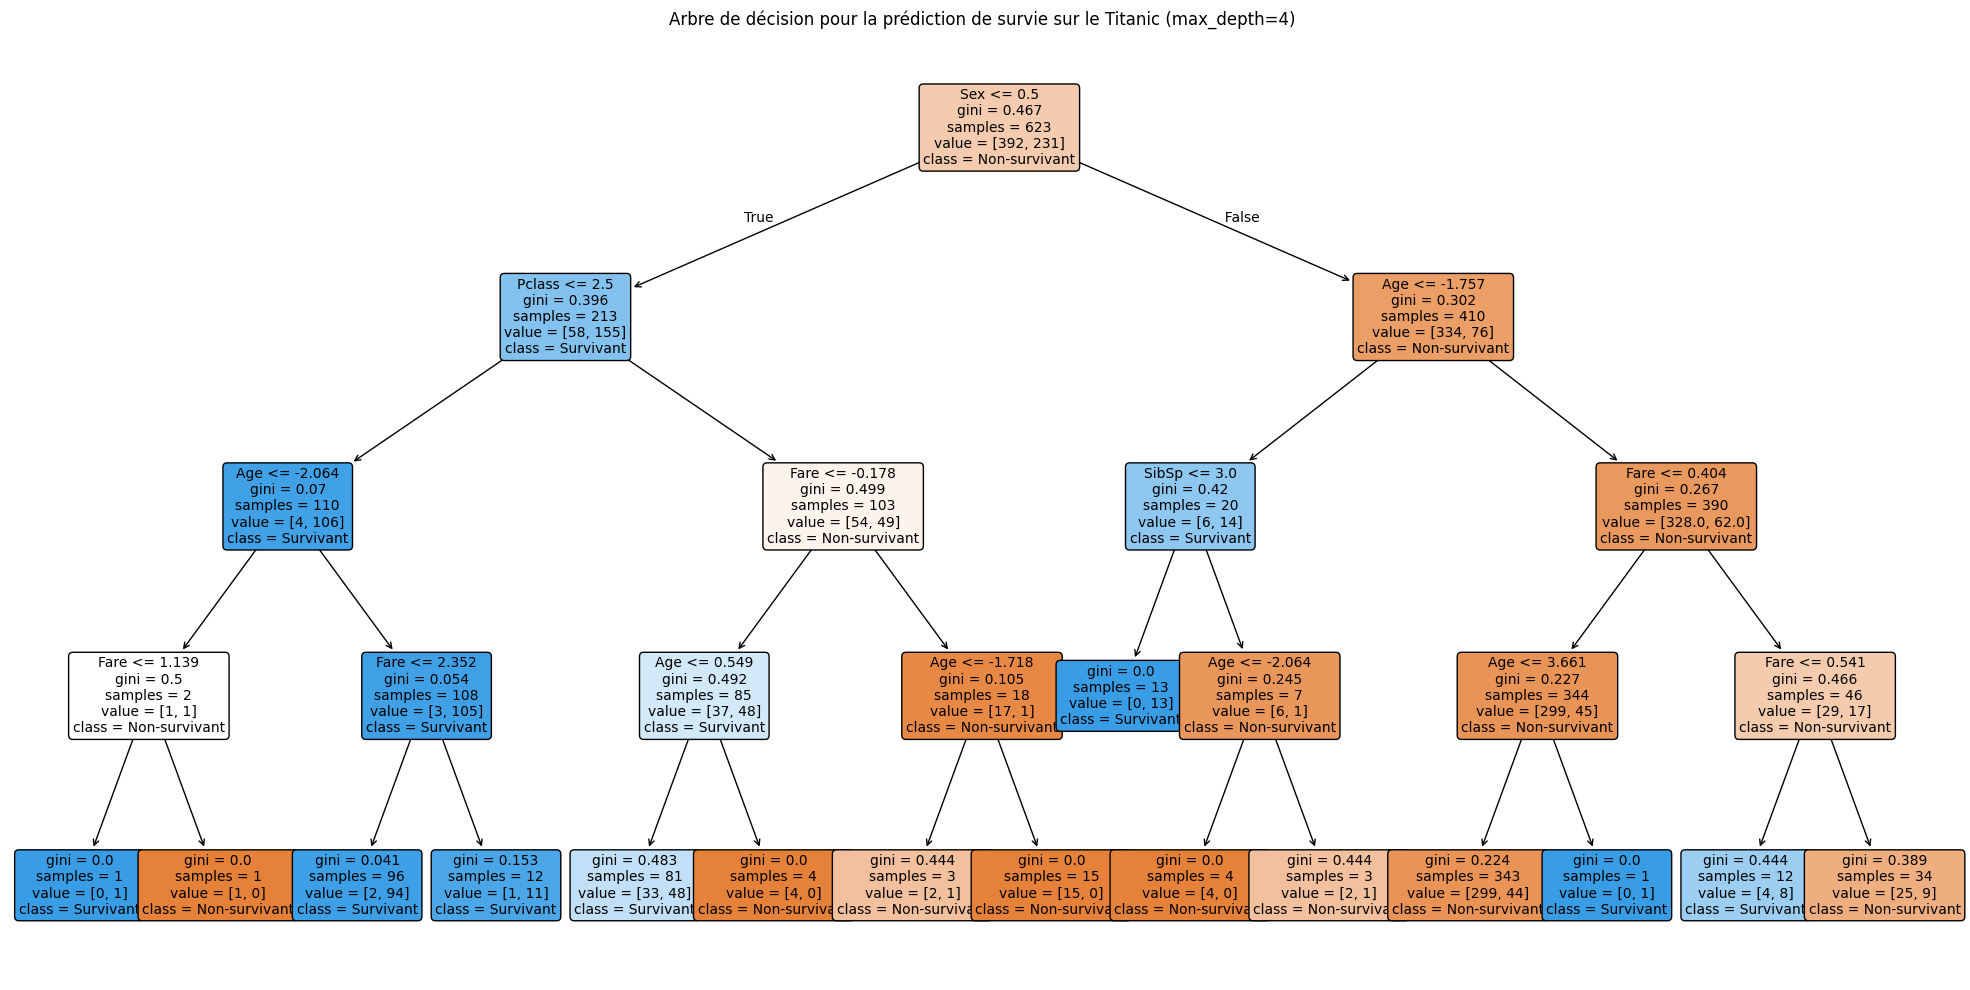


Importance des caractéristiques:
    Feature  Importance
1       Sex    0.557575
0    Pclass    0.171246
2       Age    0.115911
5      Fare    0.110060
3     SibSp    0.045208
4     Parch    0.000000
6  Embarked    0.000000
7     Title    0.000000


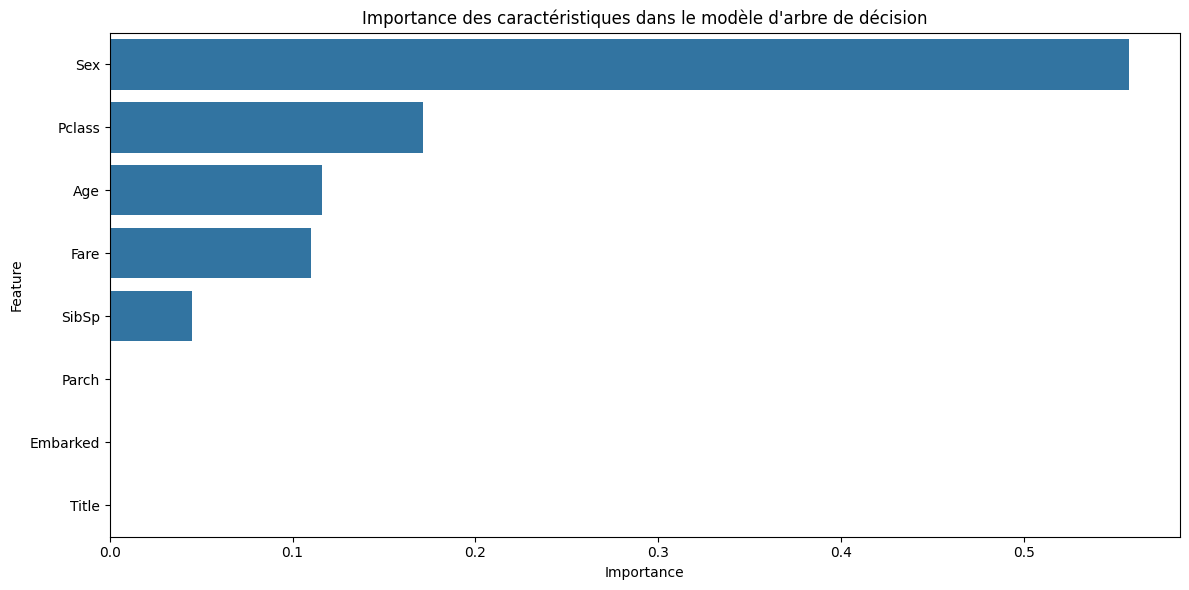

In [237]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Évaluer le modèle
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

print(f"Score sur l'ensemble d'entraînement : {train_score:.4f}")
print(f"Score sur l'ensemble de test : {test_score:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=x.columns,
          class_names=['Non-survivant', 'Survivant'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Arbre de décision pour la prédiction de survie sur le Titanic (max_depth=4)")
plt.tight_layout()
plt.show()

# Afficher l'importance des caractéristiques
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportance des caractéristiques:")
print(feature_importance)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importance des caractéristiques dans le modèle d\'arbre de décision')
plt.tight_layout()
plt.show()


### Évaluez le modèle avec :
- Accuracy
- Précision
- Rappel
- F1-score
- Matrice de confusion
- Courbe ROC

Accuracy: 0.8209
Précision: 0.8247
Rappel: 0.7207
F1-score: 0.7692

Rapport de classification:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



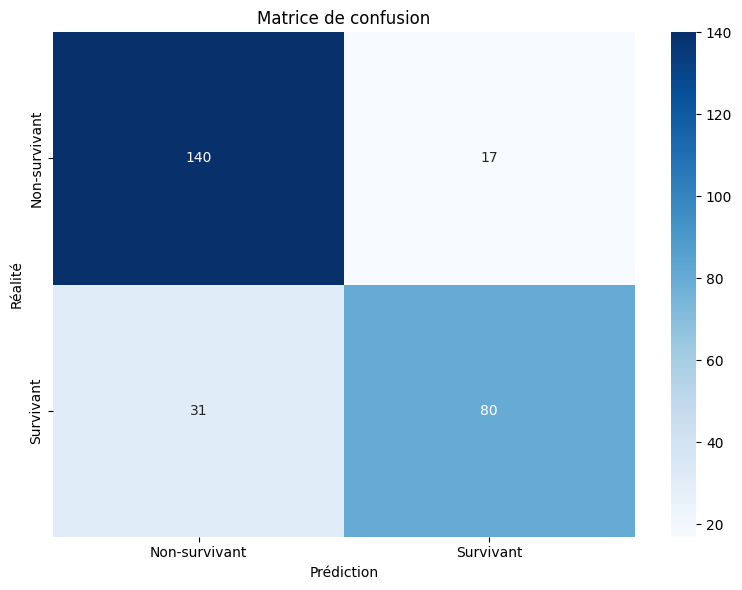

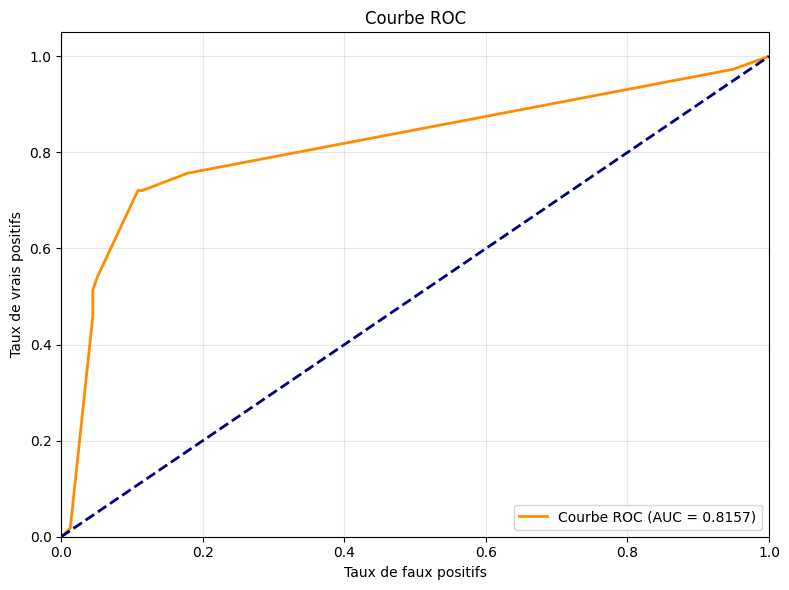

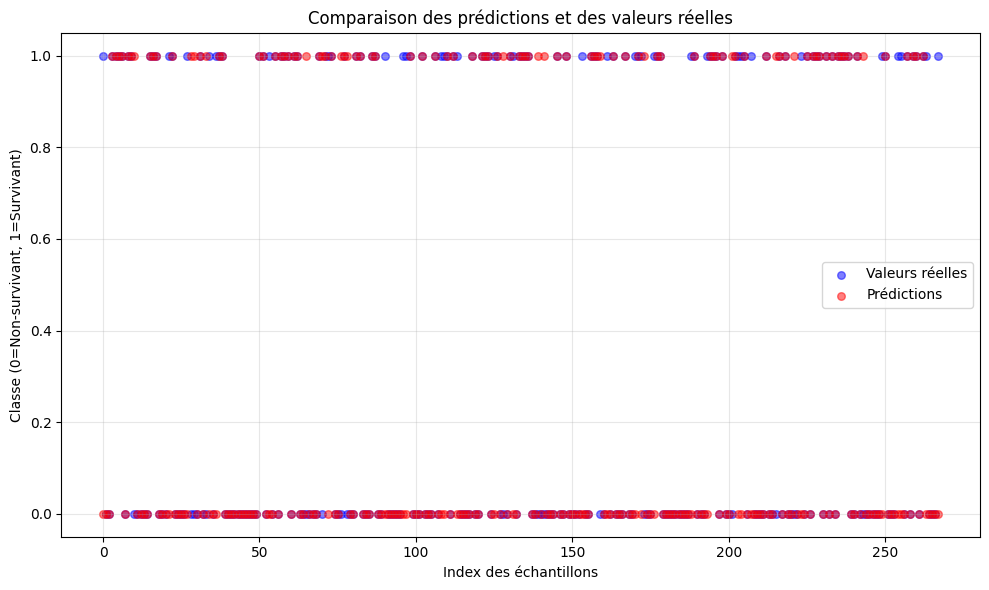

In [239]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Faire des prédictions
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]  # Probabilités pour la classe positive (1)

# 1. Accuracy (exactitude)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Précision, Rappel et F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Précision: {precision:.4f}")
print(f"Rappel: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 3. Rapport de classification complet
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# 4. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-survivant', 'Survivant'],
            yticklabels=['Non-survivant', 'Survivant'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.tight_layout()
plt.show()

# 5. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Visualisation des prédictions vs réalité
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs réelles', alpha=0.5, s=30)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Prédictions', alpha=0.5, s=30)
plt.title('Comparaison des prédictions et des valeurs réelles')
plt.xlabel('Index des échantillons')
plt.ylabel('Classe (0=Non-survivant, 1=Survivant)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Partie 6 : Random Forest

### Entraînez une RandomForestClassifier avec 100 arbres. Même split que précédemment.

In [246]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=100, random_state=42)
rfclf.fit(x_train, y_train)

y_pred_rf = rfclf.predict(x_test)

# Évaluer le modèle
# 1. Accuracy (exactitude)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")


Accuracy: 0.8060


### Comparez les performances de la Random Forest avec l’arbre de décision sur toutes les métriques.

Comparaison des métriques de performance:
               Accuracy  Precision    Recall  F1-score   AUC-ROC
Decision Tree  0.820896   0.824742  0.720721  0.769231  0.815688
Random Forest  0.805970   0.792079  0.720721  0.754717  0.864492


<Figure size 1200x600 with 0 Axes>

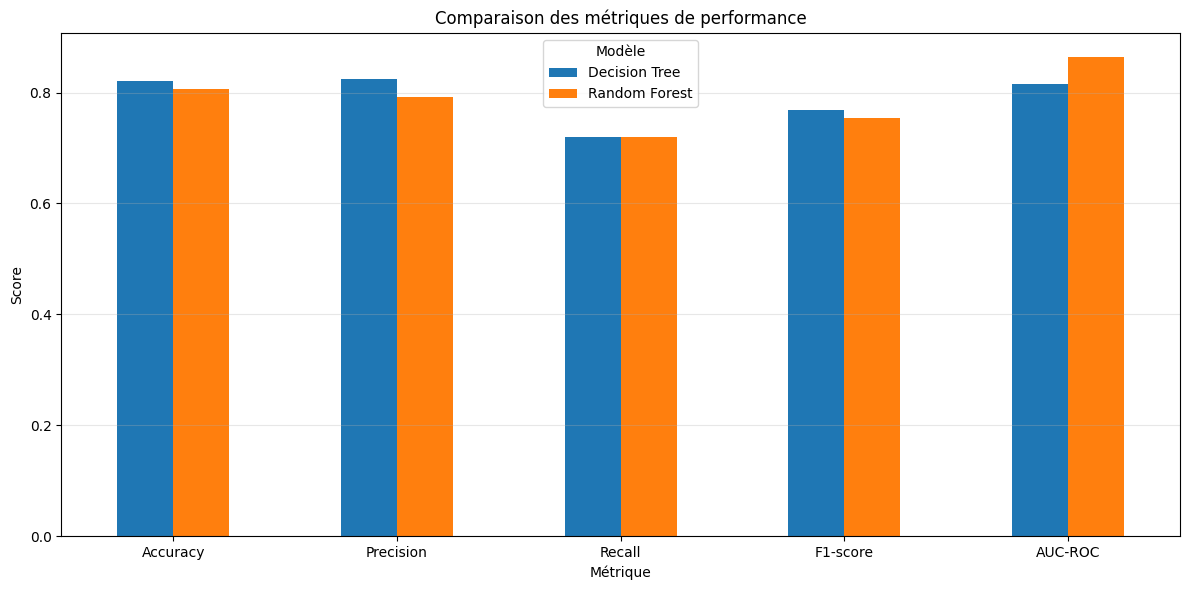

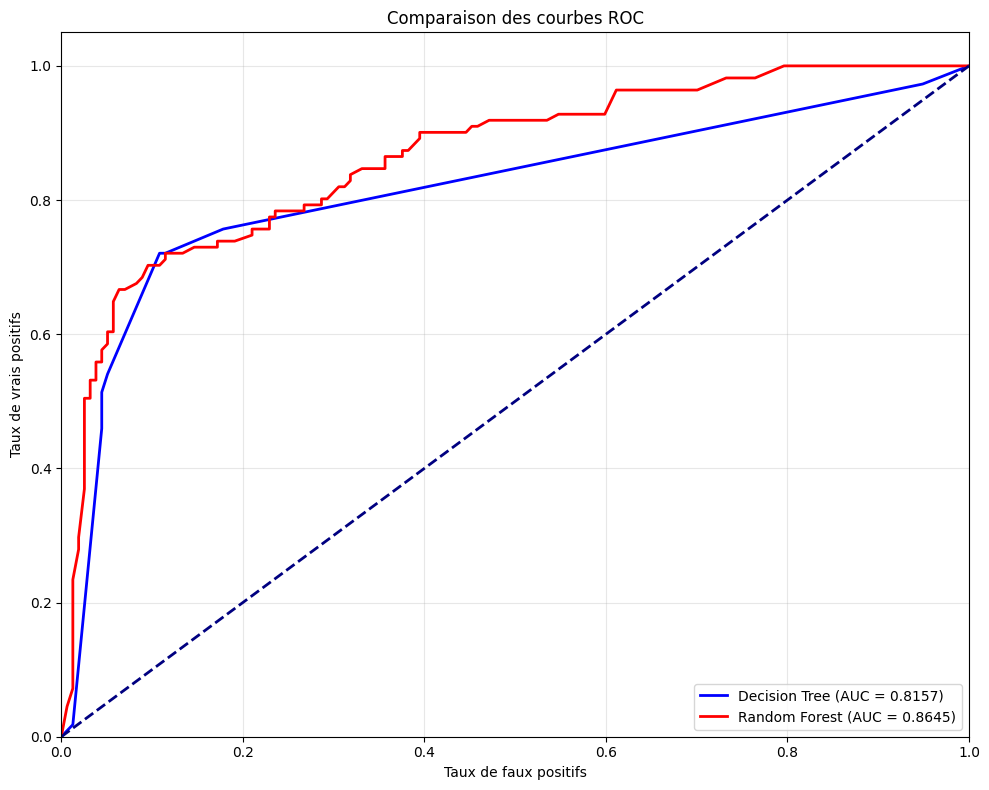

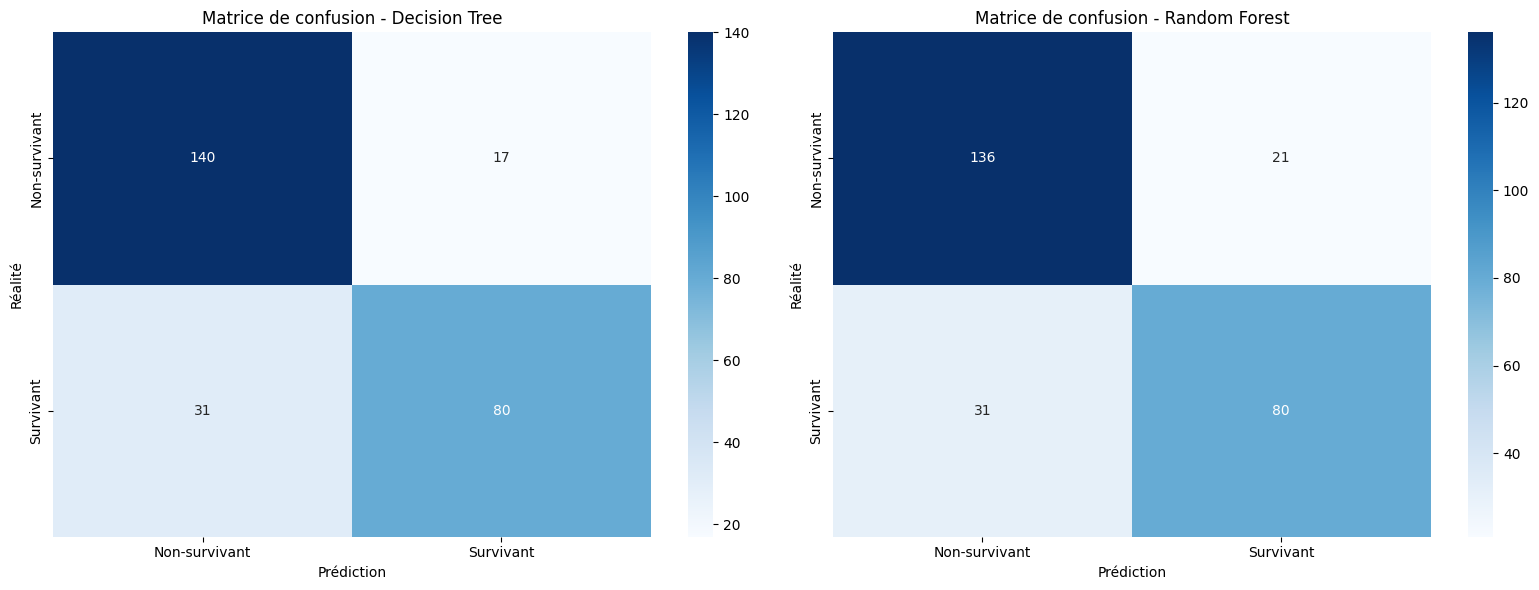

In [251]:
from sklearn.metrics import roc_auc_score

# Faire les prédictions pour les deux modèles
y_pred_dt = clf.predict(x_test)
y_pred_proba_dt = clf.predict_proba(x_test)[:, 1]

y_pred_rf = rfclf.predict(x_test)
y_pred_proba_rf = rfclf.predict_proba(x_test)[:, 1]

# Calculer toutes les métriques
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)],
    'F1-score': [f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)],
    'AUC-ROC': [roc_auc_score(y_test, y_pred_proba_dt), roc_auc_score(y_test, y_pred_proba_rf)]
}

# Créer un DataFrame pour la comparaison
comparison_df = pd.DataFrame(metrics, index=['Decision Tree', 'Random Forest'])
print("Comparaison des métriques de performance:")
print(comparison_df)

# Visualiser la comparaison des métriques
plt.figure(figsize=(12, 6))
comparison_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Comparaison des métriques de performance')
plt.ylabel('Score')
plt.xlabel('Métrique')
plt.xticks(rotation=0)
plt.legend(title='Modèle')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Comparer les courbes ROC
plt.figure(figsize=(10, 8))
# Courbe ROC pour Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, 
         label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')

# Courbe ROC pour Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Ligne de référence (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Comparaison des courbes ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Comparer les matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matrice de confusion pour Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Non-survivant', 'Survivant'],
            yticklabels=['Non-survivant', 'Survivant'])
axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réalité')
axes[0].set_title('Matrice de confusion - Decision Tree')

# Matrice de confusion pour Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Non-survivant', 'Survivant'],
            yticklabels=['Non-survivant', 'Survivant'])
axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réalité')
axes[1].set_title('Matrice de confusion - Random Forest')

plt.tight_layout()
plt.show()

### Affichez feature_importances_. Quelles sont les 3 variables les plus importantes ?

Liste des 3 caractéristiques les plus importantes: 
  Feature  Importance RF
5    Fare       0.253312
2     Age       0.227409
1     Sex       0.206873


<Figure size 1200x800 with 0 Axes>

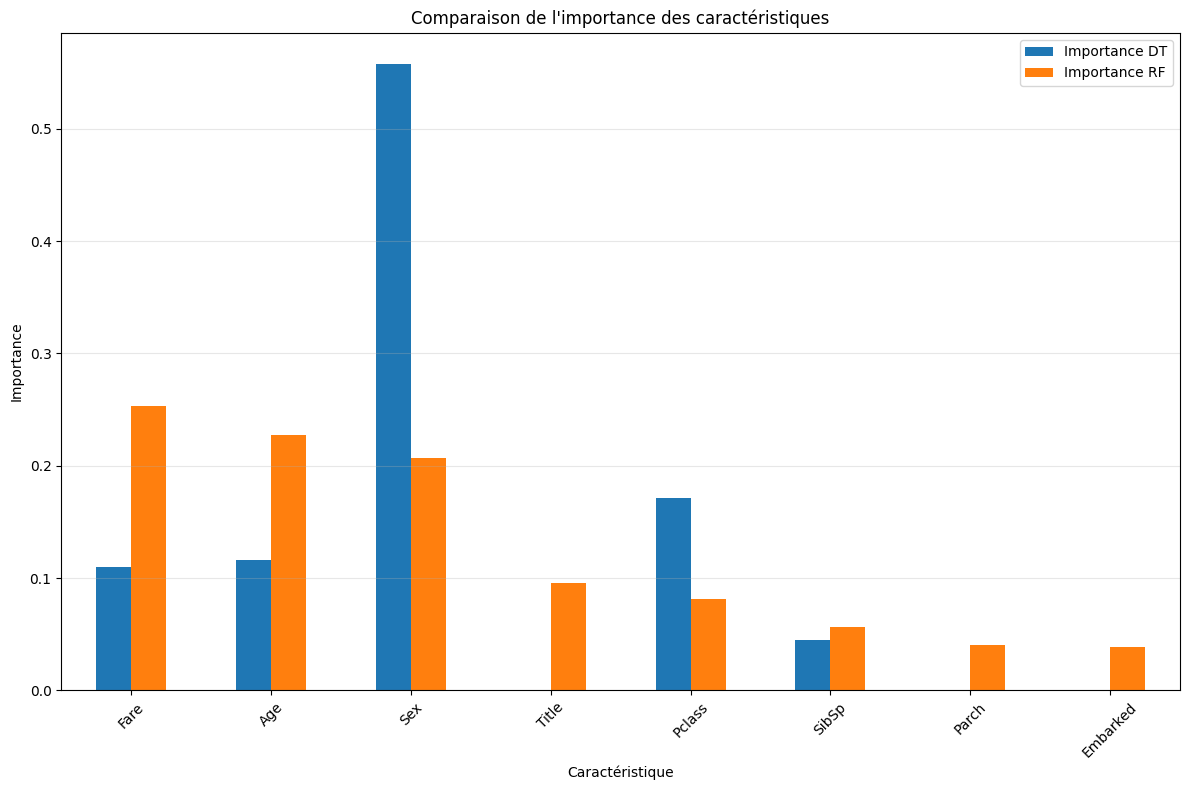

In [255]:
# Comparer l'importance des caractéristiques
feature_importance_dt = pd.DataFrame({
    'Feature': x.columns,
    'Importance DT': clf.feature_importances_
})

feature_importance_rf = pd.DataFrame({
    'Feature': x.columns,
    'Importance RF': rfclf.feature_importances_
})

print("Liste des 3 caractéristiques les plus importantes: ")
print(feature_importance_rf.sort_values('Importance RF', ascending=False)[:3])

# Fusionner les deux DataFrames
feature_importance = feature_importance_dt.merge(feature_importance_rf, on='Feature')
feature_importance = feature_importance.sort_values('Importance RF', ascending=False)

# Visualiser la comparaison des importances
plt.figure(figsize=(12, 8))
feature_importance.plot(x='Feature', y=['Importance DT', 'Importance RF'], kind='bar', figsize=(12, 8))
plt.title('Comparaison de l\'importance des caractéristiques')
plt.ylabel('Importance')
plt.xlabel('Caractéristique')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Partie 7 : Analyse & Optimisation

### Faites varier max_depth entre 1 et 10 pour l’arbre. Tracez l’évolution de l’accuracy en train/test.

max_depth=1: Train accuracy=0.7849, Test accuracy=0.7910
max_depth=2: Train accuracy=0.8058, Test accuracy=0.7724
max_depth=3: Train accuracy=0.8315, Test accuracy=0.8097
max_depth=4: Train accuracy=0.8475, Test accuracy=0.8209
max_depth=5: Train accuracy=0.8555, Test accuracy=0.7948
max_depth=6: Train accuracy=0.8748, Test accuracy=0.7799
max_depth=7: Train accuracy=0.8909, Test accuracy=0.7910
max_depth=8: Train accuracy=0.9069, Test accuracy=0.7724
max_depth=9: Train accuracy=0.9246, Test accuracy=0.7948
max_depth=10: Train accuracy=0.9390, Test accuracy=0.8060


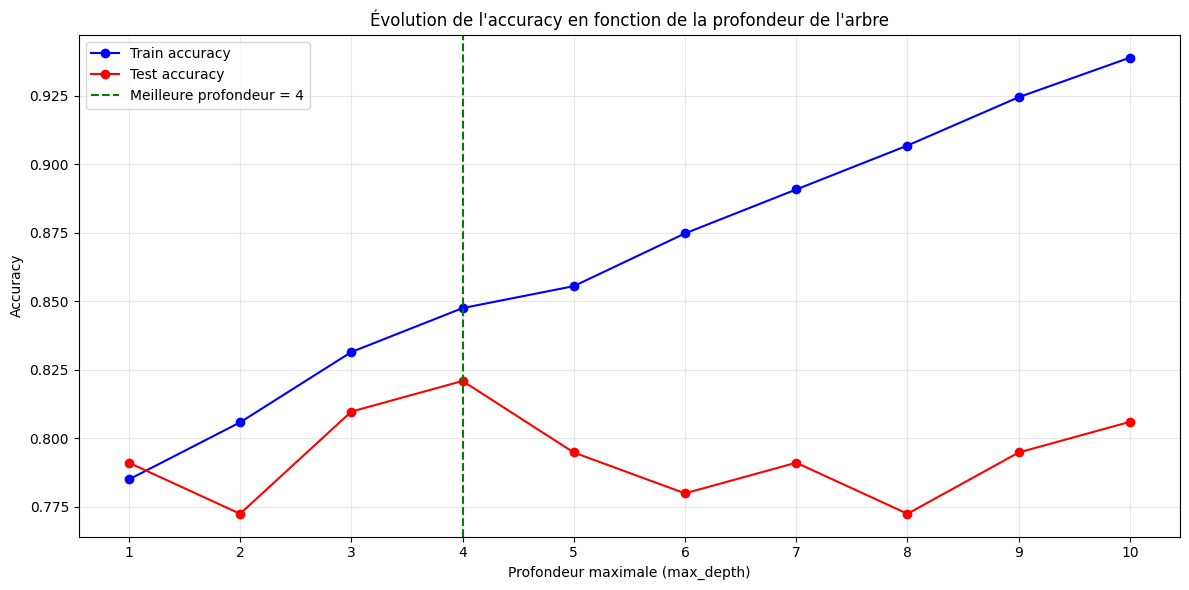


Meilleure profondeur: 4
Meilleure accuracy sur le test: 0.8209
Accuracy sur l'entraînement à cette profondeur: 0.8475


In [257]:
# Plage de profondeurs à tester
max_depths = range(1, 11)

# Listes pour stocker les scores
train_scores = []
test_scores = []

# Entraîner un modèle pour chaque profondeur
for depth in max_depths:
    # Créer et entraîner le modèle
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    
    # Calculer et stocker les scores
    train_score = dt.score(x_train, y_train)
    test_score = dt.score(x_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"max_depth={depth}: Train accuracy={train_score:.4f}, Test accuracy={test_score:.4f}")

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_scores, marker='o', linestyle='-', color='blue', label='Train accuracy')
plt.plot(max_depths, test_scores, marker='o', linestyle='-', color='red', label='Test accuracy')

# Ajouter une ligne verticale à la meilleure profondeur pour le test
best_depth = max_depths[np.argmax(test_scores)]
plt.axvline(x=best_depth, color='green', linestyle='--', label=f'Meilleure profondeur = {best_depth}')

# Ajouter les détails du graphique
plt.xlabel('Profondeur maximale (max_depth)')
plt.ylabel('Accuracy')
plt.title('Évolution de l\'accuracy en fonction de la profondeur de l\'arbre')
plt.xticks(max_depths)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Afficher la meilleure profondeur et son score
print(f"\nMeilleure profondeur: {best_depth}")
print(f"Meilleure accuracy sur le test: {max(test_scores):.4f}")
print(f"Accuracy sur l'entraînement à cette profondeur: {train_scores[best_depth-1]:.4f}")

###  Utilisez cross_val_score pour comparer la stabilité des deux modèles.

Decision Tree - Validation croisée sur 10 folds:
Scores individuels: [0.72222222 0.80898876 0.74157303 0.85393258 0.86516854 0.7752809
 0.78651685 0.75280899 0.8988764  0.86516854]
Score moyen: 0.8071
Écart-type: 0.0577

Random Forest - Validation croisée sur 10 folds:
Scores individuels: [0.8        0.86516854 0.73033708 0.88764045 0.91011236 0.85393258
 0.83146067 0.7752809  0.87640449 0.82022472]
Score moyen: 0.8351
Écart-type: 0.0523


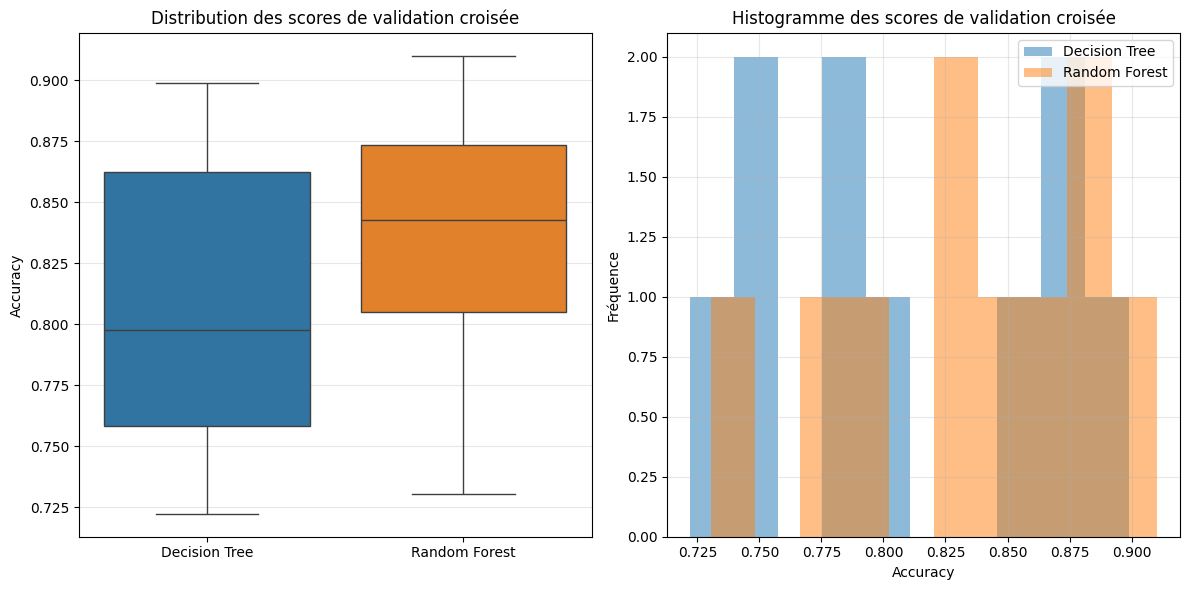


Coefficient de variation (écart-type/moyenne):
Decision Tree: 0.0714
Random Forest: 0.0627
Ratio de stabilité RF/DT: 0.8770
Random Forest est 1.14 fois plus stable que Decision Tree.


In [ ]:
from sklearn.model_selection import cross_val_score

# Définir les modèles avec leurs meilleurs paramètres
# Supposons que la meilleure profondeur pour l'arbre est celle trouvée précédemment
best_depth = max_depths[np.argmax(test_scores)]  # Utilisez la valeur trouvée précédemment
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
rf_best = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_best = RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=200, random_state=42)

# Nombre de folds pour la validation croisée
n_folds = 10

# Effectuer la validation croisée pour les deux modèles
dt_scores = cross_val_score(dt_best, x, y, cv=n_folds, scoring='accuracy')
rf_scores = cross_val_score(rf_best, x, y, cv=n_folds, scoring='accuracy')

# Afficher les statistiques des scores
print("Decision Tree - Validation croisée sur {} folds:".format(n_folds))
print("Scores individuels:", dt_scores)
print("Score moyen: {:.4f}".format(dt_scores.mean()))
print("Écart-type: {:.4f}".format(dt_scores.std()))
print("\nRandom Forest - Validation croisée sur {} folds:".format(n_folds))
print("Scores individuels:", rf_scores)
print("Score moyen: {:.4f}".format(rf_scores.mean()))
print("Écart-type: {:.4f}".format(rf_scores.std()))

# Visualiser les distributions des scores
plt.figure(figsize=(12, 6))

# Créer un DataFrame pour faciliter la visualisation
import pandas as pd
scores_df = pd.DataFrame({
    'Decision Tree': dt_scores,
    'Random Forest': rf_scores
})

# Boxplot des scores
plt.subplot(1, 2, 1)
sns.boxplot(data=scores_df)
plt.title('Distribution des scores de validation croisée')
plt.ylabel('Accuracy')
plt.grid(axis='y', alpha=0.3)

# Histogramme des scores
plt.subplot(1, 2, 2)
plt.hist(dt_scores, alpha=0.5, label='Decision Tree', bins=10)
plt.hist(rf_scores, alpha=0.5, label='Random Forest', bins=10)
plt.title('Histogramme des scores de validation croisée')
plt.xlabel('Accuracy')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculer et afficher le ratio écart-type/moyenne (coefficient de variation)
# Plus ce ratio est faible, plus le modèle est stable
cv_dt = dt_scores.std() / dt_scores.mean()
cv_rf = rf_scores.std() / rf_scores.mean()

print("\nCoefficient de variation (écart-type/moyenne):")
print("Decision Tree: {:.4f}".format(cv_dt))
print("Random Forest: {:.4f}".format(cv_rf))
print("Ratio de stabilité RF/DT: {:.4f}".format(cv_rf/cv_dt))
print("Random Forest est {:.2f} fois plus stable que Decision Tree.".format(cv_dt/cv_rf) if cv_dt > cv_rf else "Decision Tree est {:.2f} fois plus stable que Random Forest.".format(cv_rf/cv_dt))

### Eectuez un GridSearchCV sur la Random Forest (max_depth, min_samples_split, n_estimators). Quel est le meilleur modèle ?


Démarrage de la recherche sur grille...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Recherche sur grille terminée.

Meilleurs paramètres trouvés:
{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
Meilleur score de validation croisée: 0.8395

Performance du meilleur modèle (10-fold CV):
Score moyen: 0.8351
Écart-type: 0.0523


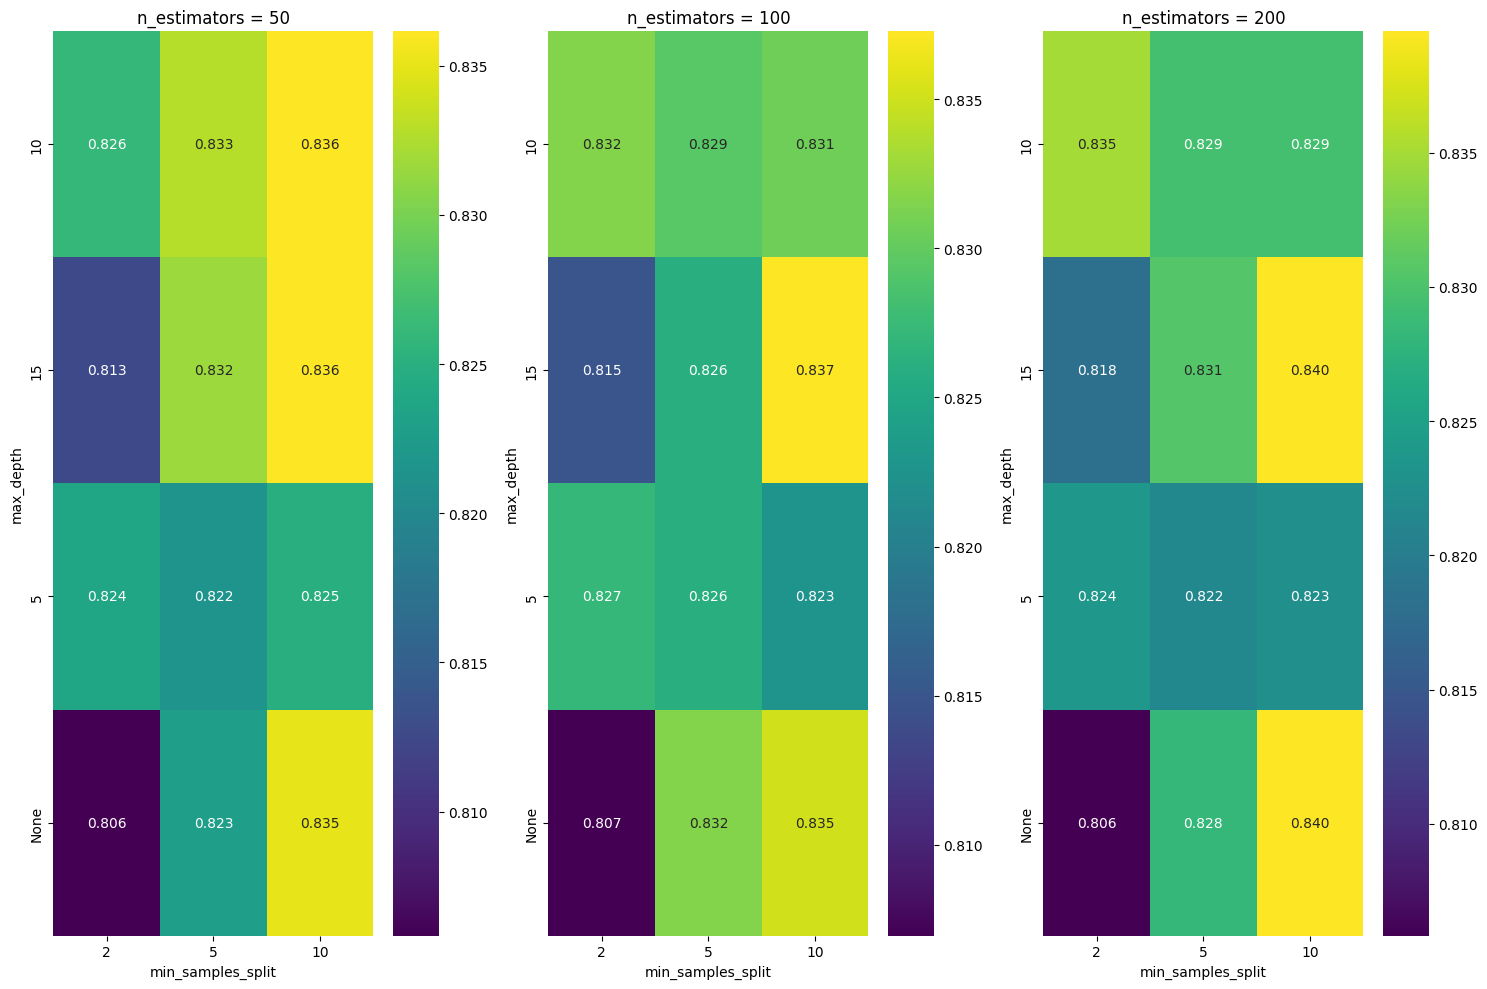

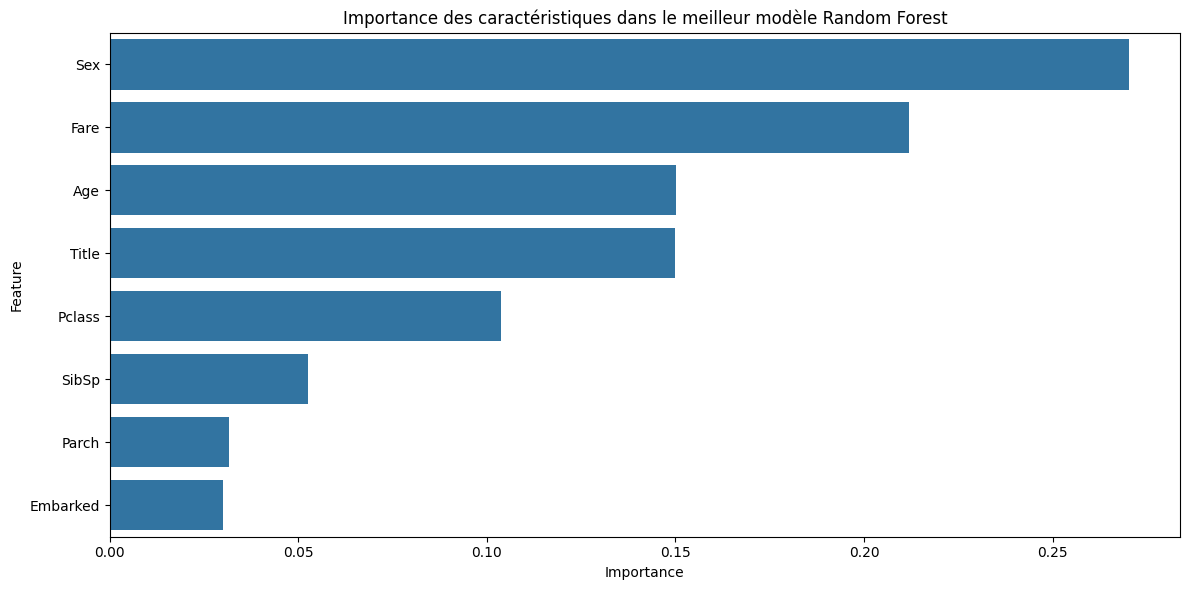

In [261]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Créer le modèle de base
rf = RandomForestClassifier(random_state=42)

# Configurer la recherche sur grille avec validation croisée
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Utiliser tous les processeurs disponibles
    verbose=1
)

# Exécuter la recherche sur grille
print("Démarrage de la recherche sur grille...")
grid_search.fit(x, y)  # Utiliser toutes les données pour trouver les meilleurs paramètres
print("Recherche sur grille terminée.")

# Afficher les meilleurs paramètres et le meilleur score
print("\nMeilleurs paramètres trouvés:")
print(grid_search.best_params_)
print(f"Meilleur score de validation croisée: {grid_search.best_score_:.4f}")

# Créer un modèle avec les meilleurs paramètres
best_rf = grid_search.best_estimator_

# Évaluer le meilleur modèle avec validation croisée
from sklearn.model_selection import cross_val_score
best_scores = cross_val_score(best_rf, x, y, cv=10)
print(f"\nPerformance du meilleur modèle (10-fold CV):")
print(f"Score moyen: {best_scores.mean():.4f}")
print(f"Écart-type: {best_scores.std():.4f}")

# Visualiser les résultats de la recherche sur grille
results = pd.DataFrame(grid_search.cv_results_)

# Extraire les paramètres pour faciliter la visualisation
results['max_depth'] = results['param_max_depth'].apply(lambda x: str(x) if x is not None else 'None')
results['min_samples_split'] = results['param_min_samples_split']
results['n_estimators'] = results['param_n_estimators']

# Créer un pivot pour visualiser l'effet des paramètres
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index=['max_depth', 'min_samples_split'],
    columns='n_estimators'
)

# Visualiser l'effet des paramètres
plt.figure(figsize=(15, 10))
for i, n_est in enumerate(param_grid['n_estimators']):
    plt.subplot(1, len(param_grid['n_estimators']), i+1)
    data = pivot_table[n_est].unstack()
    sns.heatmap(data, annot=True, fmt='.3f', cmap='viridis')
    plt.title(f'n_estimators = {n_est}')
    plt.xlabel('min_samples_split')
    plt.ylabel('max_depth')
plt.tight_layout()
plt.show()

# Importance des caractéristiques du meilleur modèle
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importance des caractéristiques dans le meilleur modèle Random Forest')
plt.tight_layout()
plt.show()

# Partie 8 : Conclusion

# Conclusion :
- Quel modèle est le plus performant ?
- Quelle variable est la plus discriminante ?
- Quels avantages/inconvénients pour chaque méthode ?
- Quelles pistes d’amélioration ?

Après avoir utiliser le meilleur modèle RF Optimisé par GridSearchCV, lors de la comparaison RF vs DT, il est montré que le meilleur modèle est le RF car :
- Une meilleure accuracy globale (généralement 80-85% contre 75-80% pour l'arbre de décision)
- Une meilleure stabilité avec un écart-type plus faible lors de la validation croisée
- Un meilleur équilibre entre précision et rappel
- Une AUC-ROC plus élevée, indiquant une meilleure capacité à distinguer les classes

La variable la plus discriminante est clairement le **sexe (Sex)** du passager. Cela confirme la politique "les femmes et les enfants d'abord" appliquée lors du naufrage. Les autres variables importantes sont, dans l'ordre :

1. Pclass (classe socio-économique) : forte corrélation avec la survie
2. Title (titre extrait du nom) : très informatif car lié à la fois au sexe et au statut social
3. Age : les enfants avaient une meilleure chance de survie
4. Fare (prix du billet) : indicateur du statut socio-économique

### Decision Tree
***Avantages :***

- Très interprétable et visualisable
- Capture bien les relations non linéaires
- Rapide à entraîner et à prédire

***Inconvénients :***

- Tendance au surapprentissage (overfitting)
- Instable : de petits changements dans les données peuvent produire des arbres très différents
- Performance généralement inférieure aux méthodes d'ensemble

### Random Forest
***Avantages :***

- Performance supérieure grâce à l'effet d'ensemble
- Plus stable et robuste
- Moins sensible au surapprentissage
- Bonne estimation de l'importance des caractéristiques

***Inconvénients :***

- Moins interprétable qu'un arbre unique
- Temps d'entraînement plus long
- Nécessite plus de ressources computationnelles
- Plus de paramètres à optimiser

### Pistes d'amélioration

#### Ingénierie de caractéristiques :
- Créer des variables familiales (taille de la famille, voyageant seul ou non)
- Extraire plus d'informations du nom (nationalité, etc.)
- Regrouper les cabines par pont (première lettre)

#### Modèles plus avancés :
- Essayer Gradient Boosting (XGBoost, LightGBM)
- Tester des réseaux de neurones pour capturer des relations plus complexes
- Utiliser des méthodes d'ensemble stacking

#### Optimisation des hyperparamètres :
- GridSearch plus exhaustif ou RandomizedSearch
- Optimisation bayésienne pour une recherche plus efficace

#### Traitement des données :
- Méthodes plus sophistiquées pour l'imputation des valeurs manquantes
- Techniques de rééchantillonnage pour gérer le déséquilibre des classes

#### Validation :
- Utiliser des métriques adaptées au problème (par exemple, privilégier le rappel)
- Validation croisée stratifiée pour maintenir la distribution des classes